Dataset Loaded Successfully
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   1

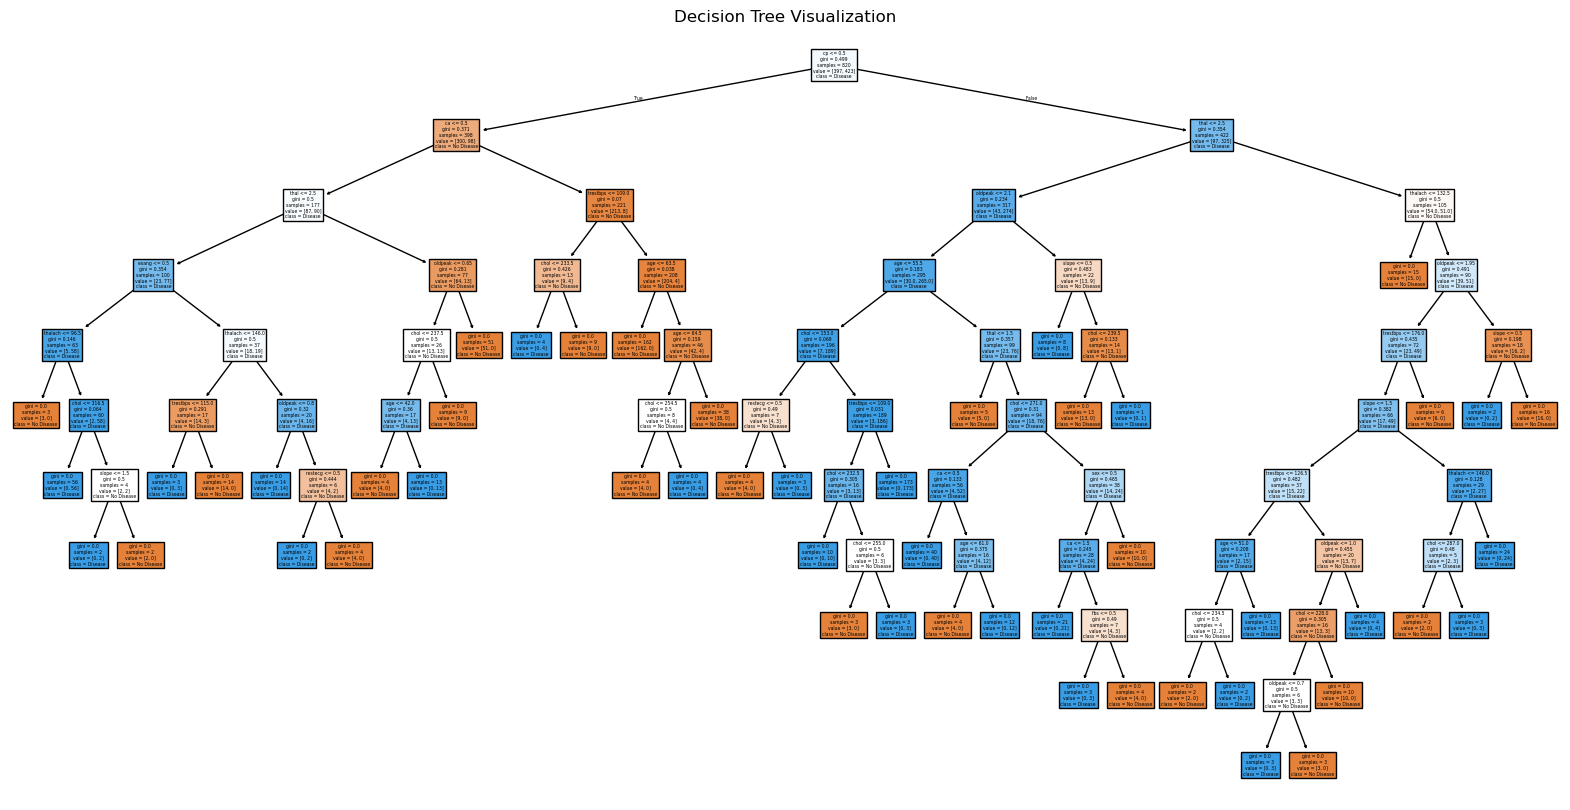

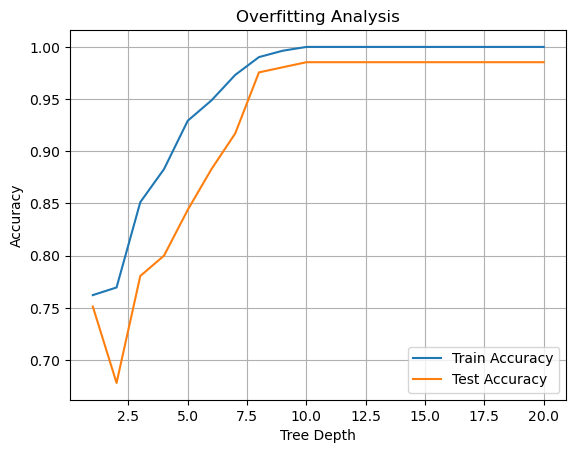


Random Forest Accuracy: 0.9853658536585366


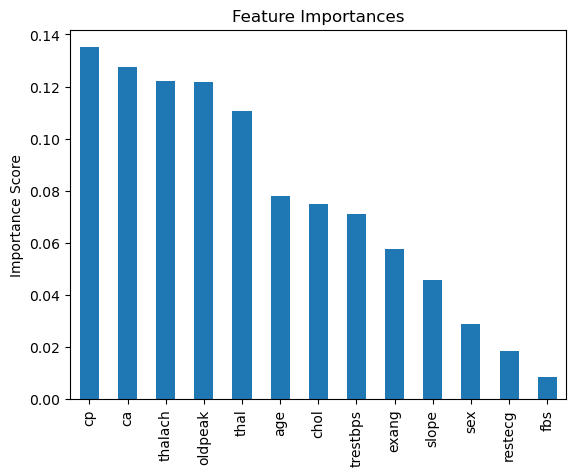


Decision Tree CV Accuracy: 1.00 ± 0.00
Random Forest CV Accuracy: 1.00 ± 0.01

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

url = r"C:\Users\kanik\Downloads\archive\heart.csv"
df = pd.read_csv(url)
print("Dataset Loaded Successfully")

print(df.head())
print(df.describe())
print(df.isnull().sum())

X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

train_acc = []
test_acc = []
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure()
plt.plot(range(1, 21), train_acc, label='Train Accuracy')
plt.plot(range(1, 21), test_acc, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis')
plt.legend()
plt.grid()
plt.show()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure()
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance Score')
plt.show()

dt_cv_score = cross_val_score(dt_model, X, y, cv=5)
rf_cv_score = cross_val_score(rf_model, X, y, cv=5)

print("\nDecision Tree CV Accuracy: {:.2f} ± {:.2f}".format(dt_cv_score.mean(), dt_cv_score.std()))
print("Random Forest CV Accuracy: {:.2f} ± {:.2f}".format(rf_cv_score.mean(), rf_cv_score.std()))

print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
